<h1>Sales Analysis Project</h1>

<h2>Problem Statement</h2>

AAL, established in 2000, is a well-known brand in Australia, particularly 
recognized for its clothing business. It has opened branches in various states, 
metropolises, and tier-1 and tier-2 cities across the country.
The brand caters to all age groups, from kids to the elderly.
Currently experiencing a surge in business, AAL is actively pursuing expansion 
opportunities. To facilitate informed investment decisions, the CEO has assigned 
the responsibility to the head of AAL’s sales and marketing (S&M) department. 
The specific tasks include:
1) Identify the states that are generating the highest revenues.
2) Develop sales programs for states with lower revenues. The head of sales 
and marketing has requested your assistance with this task.
Analyze the sales data of the company for the fourth quarter in Australia, 
examining it on a state-by-state basis. Provide insights to assist the company in 
making data-driven decisions for the upcoming year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the CSV datafile into Pandas dataframe

In [3]:
df=pd.read_csv('AusApparalSales4thQrt2020.csv')

<h3>Data Wrangling</h3>

In [4]:
#Lets view the head of the datframe

In [5]:
df.head() #display first five rows of the dataframe

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [6]:
#Lets view the tail of the dataframe

In [7]:
df.tail() #Display last five rows of the Dataframe

,Date,Time,State,Group,Unit,Sales
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500


In [8]:
df['Date'].unique() #list out the unique values of Date column

array(['1-Oct-2020', '2-Oct-2020', '3-Oct-2020', '4-Oct-2020',
       '5-Oct-2020', '6-Oct-2020', '7-Oct-2020', '8-Oct-2020',
       '9-Oct-2020', '10-Oct-2020', '11-Oct-2020', '12-Oct-2020',
       '13-Oct-2020', '14-Oct-2020', '15-Oct-2020', '16-Oct-2020',
       '17-Oct-2020', '18-Oct-2020', '19-Oct-2020', '20-Oct-2020',
       '21-Oct-2020', '22-Oct-2020', '23-Oct-2020', '24-Oct-2020',
       '25-Oct-2020', '26-Oct-2020', '27-Oct-2020', '28-Oct-2020',
       '29-Oct-2020', '30-Oct-2020', '1-Nov-2020', '2-Nov-2020',
       '3-Nov-2020', '4-Nov-2020', '5-Nov-2020', '6-Nov-2020',
       '7-Nov-2020', '8-Nov-2020', '9-Nov-2020', '10-Nov-2020',
       '11-Nov-2020', '12-Nov-2020', '13-Nov-2020', '14-Nov-2020',
       '15-Nov-2020', '16-Nov-2020', '17-Nov-2020', '18-Nov-2020',
       '19-Nov-2020', '20-Nov-2020', '21-Nov-2020', '22-Nov-2020',
       '23-Nov-2020', '24-Nov-2020', '25-Nov-2020', '26-Nov-2020',
       '27-Nov-2020', '28-Nov-2020', '29-Nov-2020', '30-Nov-2020',
       '1-Dec

In [9]:
df['Time'].unique()

array([' Morning', ' Afternoon', ' Evening'], dtype=object)

In [10]:
df['State'].unique()

array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object)

In [11]:
df['Group'].unique()

array([' Kids', ' Men', ' Women', ' Seniors'], dtype=object)

In [12]:
df['Unit'].unique()

array([ 8,  4, 15,  3, 10, 11, 13,  5,  6,  9, 14, 12, 16, 28, 21, 29, 22,
       32, 49, 36, 34, 26, 31, 27, 43, 50, 44, 20, 18, 19, 39, 17, 23, 40,
       30,  7, 33, 42, 46, 48, 37, 25, 35, 45, 47, 38, 41, 24,  2, 51, 63,
       62, 52, 56, 59, 64, 53, 61, 54, 60, 55, 65, 57, 58], dtype=int64)

In [13]:
df['Sales'].unique()

array([ 20000,  10000,  37500,   7500,  25000,  27500,  32500,  12500,
        15000,  22500,  35000,  30000,  40000,  70000,  52500,  72500,
        55000,  80000, 122500,  90000,  85000,  65000,  77500,  67500,
       107500, 125000, 110000,  50000,  45000,  47500,  97500,  42500,
        57500, 100000,  75000,  17500,  82500, 105000, 115000, 120000,
        92500,  62500,  87500, 112500, 117500,  95000, 102500,  60000,
         5000, 127500, 157500, 155000, 130000, 140000, 147500, 160000,
       132500, 152500, 135000, 150000, 137500, 162500, 142500, 145000],
      dtype=int64)

<h3>Variable Notes</h3>
<ol>
<li><b>Date</b> - column contains the transaction date</li>
<li><b>Time</b> - column specifies the part of day during which the transaction took place (i.e; Morning, Afternoon, Evening)</li>
<li><b>State</b> - column contains the name of the state where sale took place [' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS']</li>
<li><b>Group</b> - column contains the age group for which the product was purchased [' Kids', ' Men', ' Women', ' Seniors']</li>
<li><b>Unit</b> - column contains the number of units sold</li>
<li><b>Sales</b> - column contains the total amount of sale</li>
</ol>

In [14]:
#Lets get more information on the columns and the data within it using the info()

In [15]:
df.info() #Display the information about the columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


<span style="background-color: #FFFF00">
<b>There are in total 7560 rows and 6 columns in the dataset. There are no rows with null or missing data as the Non-Null count of all the columns is 7560. We can further confirm this using notna()</b>
</span>

In [16]:
df['Date'].notna() #return True if the Date column value in the row is not available

0       True
1       True
2       True
3       True
4       True
        ... 
7555    True
7556    True
7557    True
7558    True
7559    True
Name: Date, Length: 7560, dtype: bool

In [17]:
df['Date'].notna().count() #Get the count of the rows where the Date column values are available

7560

<i><b>As the count of Not-Null values is 7560, so there are no null values in Date column. Similarly, let us check for Time and other columns.</b></i>

In [18]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

<span style="background-color: #FFFF00">
<b>So we see that there are no missing or null values in any of the six columns.</b>
</span>

Now, let us check the datatypes of various columns

In [19]:
df.dtypes  # Displays the data types of the various columns in the dataframe

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

Let us also check the memory usage of the dataframe.

In [20]:
df.size

45360

In [21]:
df.memory_usage() #Displays the column-wise breakup of the memory consumption of the dataframe

Index      132
Date     60480
Time     60480
State    60480
Group    60480
Unit     60480
Sales    60480
dtype: int64

<span style="background-color: #FFFF00">
<b>We se that Date column is of type object. Lets convert it to datetime for indexing purpose.</b>
</span>

In [22]:
df['Date']=pd.to_datetime(df['Date'])    #Converting object type Date column to datetime type

In [23]:
df.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [24]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


Now let us again check the memory usage.

In [25]:
df.size

45360

In [26]:
df.memory_usage()

Index      132
Date     60480
Time     60480
State    60480
Group    60480
Unit     60480
Sales    60480
dtype: int64

Now lets convert the Time, State and Group columns to categorical data.

In [27]:
df['Time']=df['Time'].astype('category')

In [28]:
df.dtypes

Date     datetime64[ns]
Time           category
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [29]:
df['State']=df['State'].astype('category')

In [30]:
df['Group']=df['Group'].astype('category')

Lets again check the datatype

In [31]:
df.dtypes

Date     datetime64[ns]
Time           category
State          category
Group          category
Unit              int64
Sales             int64
dtype: object

Again check the memory usage

In [32]:
df.size

45360

In [33]:
df.memory_usage()

Index      132
Date     60480
Time      7692
State     7916
Group     7764
Unit     60480
Sales    60480
dtype: int64

<span style="background-color: #FFFF00">
<b>It is visible from above data that the memory usage has decreased.</b>
</span>

In [34]:
#Set index on Date

In [35]:
df.set_index(['Date'],inplace=True)

In [36]:
df.head()

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500


In [37]:
#Lets us now describe the dataframe

In [38]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


<h3>Statistical Analysis of Unit and Sales data </h3>

<h4>Mean</h4>

<h5>Daily Average of Units sold</h5>

In [39]:
df['Unit'].mean()  #Average number of units sold per day in 4th Quarter

18.00542328042328

<span style="background-color: #FFFF00">
    <b>On an average daily 18 units were sold in the 4th Quarter.</b>
</span>

<h5>Daily Average of Sales</h5>

In [40]:
np.mean(df['Sales'])  #Average Sales per day in 4th Quarter

45013.5582010582

<span style="background-color: #FFFF00">
    <b>Average daily sales during 4th Quarter was 45013.5582</b>
</span>

<h5>Weekly Average of Units sold and Sales</h5>

In [41]:
df.resample('7D').mean(numeric_only=True) #returns the weekly mean of the numeric columns

,Unit,Sales
Date,,
2020-10-01,18.081633,45204.081633
2020-10-08,18.414966,46037.414966
2020-10-15,18.079932,45199.829932
2020-10-22,17.984694,44961.734694
2020-10-29,15.388889,38472.222222
2020-11-05,14.224490,35561.224490
2020-11-12,14.656463,36641.156463
2020-11-19,14.360544,35901.360544
2020-11-26,16.586735,41466.836735


<h5>Monthly Average of Units sold and Sales</h5>

In [42]:
df.resample('M').mean(numeric_only=True) # Returns the monthly mean of the numeric columns

,Unit,Sales
Date,,
2020-10-31,18.141270,45353.174603
2020-11-30,14.394048,35985.119048
2020-12-31,21.480952,53702.380952


<h4>Median</h4>

<h5>Median of Units sold</h5>

In [43]:
df['Unit'].median()

14.0

<h5>Median of Sales</h5>

In [44]:
np.median(df['Sales'])

35000.0

<h5>Weekly Median of Units sold and Sales</h5>

In [45]:
df.resample('7D').median(numeric_only=True)

,Unit,Sales
Date,,
2020-10-01,14.0,35000.0
2020-10-08,14.5,36250.0
2020-10-15,14.0,35000.0
2020-10-22,13.5,33750.0
2020-10-29,12.0,30000.0
2020-11-05,10.0,25000.0
2020-11-12,10.0,25000.0
2020-11-19,10.0,25000.0
2020-11-26,12.0,30000.0


<h5>Monthly Median of Units sold and Sales</h5>

In [46]:
df.resample('M').median(numeric_only=True)

,Unit,Sales
Date,,
2020-10-31,14.0,35000.0
2020-11-30,10.0,25000.0
2020-12-31,15.0,37500.0


<h4>Mode</h4>

<h5>Mode of Units Sold</h5>

In [47]:
df['Unit'].mode()

0    9
Name: Unit, dtype: int64

<h5>Mode of Sales</h5>

In [48]:
df['Sales'].mode()

0    22500
Name: Sales, dtype: int64

<h4>Standard Deviation</h5>

<h5>Standard Deviation of Units sold</h5>

In [49]:
df['Unit'].std()

12.901402777586458

<h5>Standard Deviation of Sales</h5>

In [50]:
np.std(df['Sales'])

32251.373704971687

<h4>Group with Highest and Lowest Sales</h4>

In [51]:
df['Group'].unique() #displaying the unique categories

[' Kids', ' Men', ' Women', ' Seniors']
Categories (4, object): [' Kids', ' Men', ' Seniors', ' Women']

In [52]:
df['Group'].value_counts() #total rows of each category

Group
 Kids       1890
 Men        1890
 Seniors    1890
 Women      1890
Name: count, dtype: int64

In [53]:
df['State'].value_counts() #total rows of each category

State
 NSW    1080
 NT     1080
 QLD    1080
 SA     1080
 TAS    1080
 VIC    1080
 WA     1080
Name: count, dtype: int64

In [79]:
df['Time'].value_counts() #total rows of each category

Time
 Afternoon    2520
 Evening      2520
 Morning      2520
Name: count, dtype: int64

<span style="background-color: #FFFF00">
    <b>We notice that the number of rows of each category of Group, State and Time are equal. So the Samples in the dataset are evenly balanced for each category. 
    So, there is a high probability that the results obtained will not be baised towards any one category.</b>
</span>

<Axes: xlabel='Group', ylabel='Sales'>

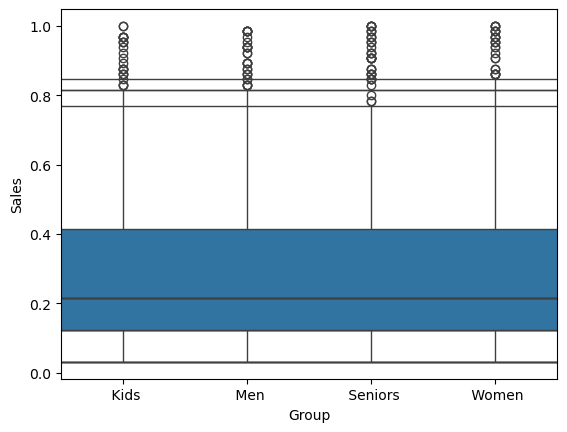

In [135]:
sns.boxplot(data=df,x='Group',y='Sales',width=30)

<Axes: ylabel='Density'>

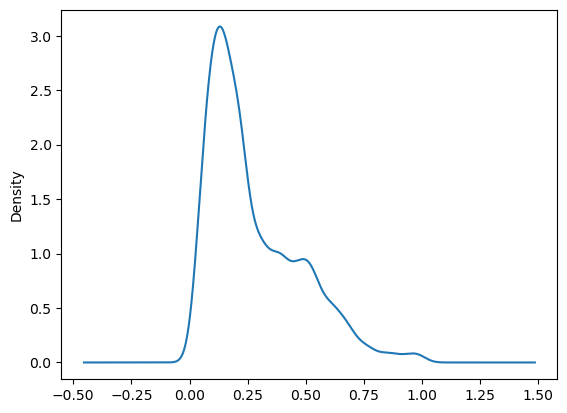

In [82]:
df.Sales.plot(kind="kde")

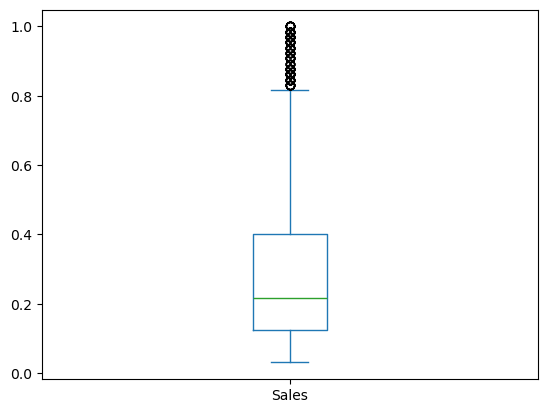

In [102]:
df.Sales.plot(kind="box")

In [84]:
df.corr(numeric_only=True)

,Unit,Sales
Unit,1.0,1.0
Sales,1.0,1.0


<Axes: >

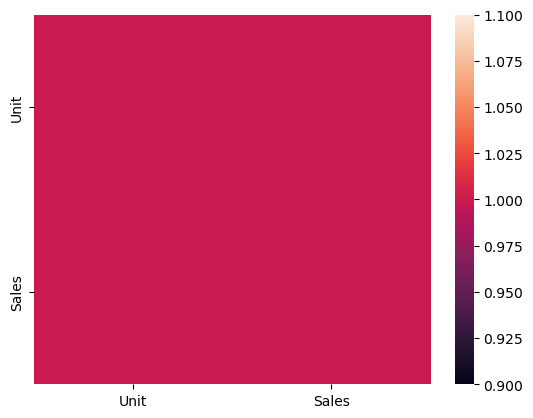

In [85]:
sns.heatmap(df.corr(numeric_only=True))

In [127]:
pd.crosstab(df.Group,df.State)

State,NSW,NT,QLD,SA,TAS,VIC,WA
Group,,,,,,,
Kids,270,270,270,270,270,270,270
Men,270,270,270,270,270,270,270
Seniors,270,270,270,270,270,270,270
Women,270,270,270,270,270,270,270


In [128]:
pd.crosstab(df.Time,df.State)

State,NSW,NT,QLD,SA,TAS,VIC,WA
Time,,,,,,,
Afternoon,360,360,360,360,360,360,360
Evening,360,360,360,360,360,360,360
Morning,360,360,360,360,360,360,360


In [137]:
pd.crosstab(df.Time,df.Group)

Group,Kids,Men,Seniors,Women
Time,,,,
Afternoon,630,630,630,630
Evening,630,630,630,630
Morning,630,630,630,630


<Axes: xlabel='Group'>

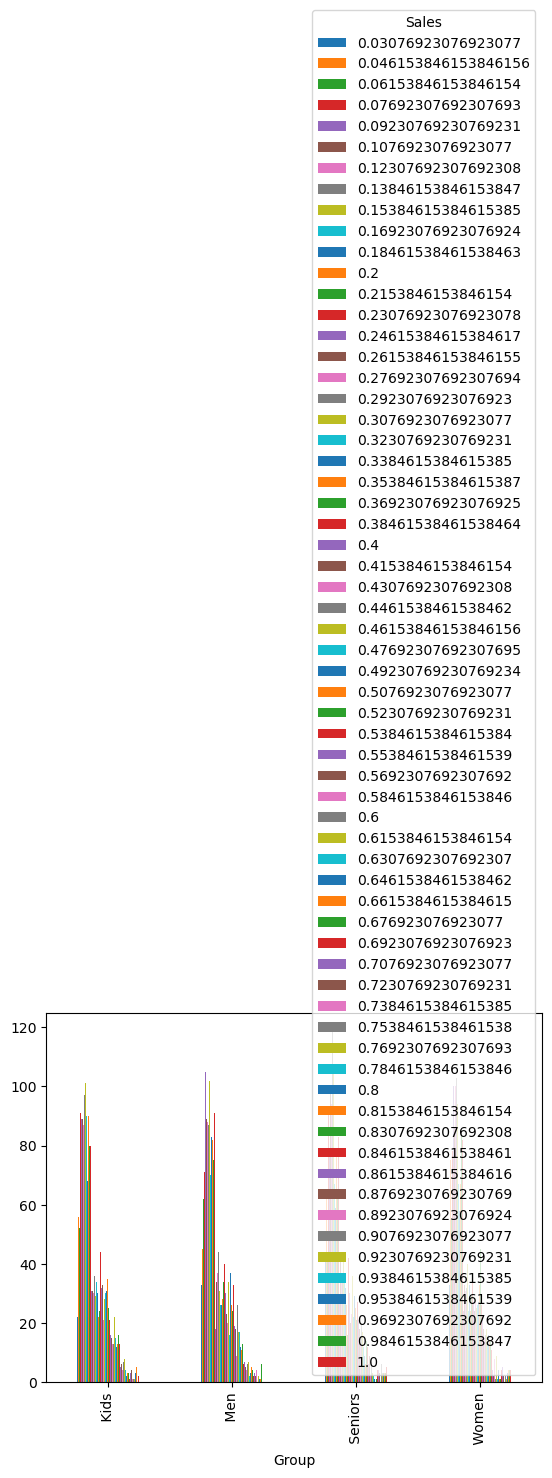

In [87]:
pd.crosstab(df.Group,df.Sales).plot(kind="bar")

In [54]:
df.groupby(['Group'],observed=True).sum(numeric_only=True)

,Unit,Sales
Group,,
Kids,34029,85072500
Men,34300,85750000
Seniors,33615,84037500
Women,34177,85442500


<h5>Group with Highest Sale</h5>

In [55]:
df.groupby(['Group'],observed=True).sum(numeric_only=True).max()['Sales']

85750000

<span style="background-color: #FFFF00">
<b>Clearly, men category have highest sales in 4th Quarter. It stood at 85750000</b>
</span>

<h5>Group with lowest Sales</h5>

In [56]:
df.groupby(['Group'],observed=True).sum(numeric_only=True).min()['Sales']

84037500

<span style="background-color: #FFFF00">
<b>Clearly, seniors category have lowest sales in 4th Quarter. It stood at 84037500</b>
</span>

<h4>Group with Highest and Lowest Unit sold in 4th Quarter</h4>

<h4>Group with highest Unit sold</h4>

In [57]:
df.groupby(['Group'],observed=True).sum(numeric_only=True).max()['Unit']

34300

<span style="background-color: #FFFF00">
<b>Highest units sold were 34300 for men category</b>
</span>

<h4>Group with lowest Unit sold</h4>

In [58]:
df.groupby(['Group'],observed=True).sum(numeric_only=True).min()['Unit']

33615

<span style="background-color: #FFFF00">
<b>Lowest units sold were 33615 for Seniors category</b>
</span>

<h4>Weekly analysis of Units sold and Sales figures for various categories of Group</h4>

In [59]:
df.groupby(['Group'],observed=False).resample('7D').sum(numeric_only=True)

Unit    Sales
Group    Date                     
 Kids    2020-10-01  2708  6770000
         2020-10-08  2734  6835000
         2020-10-15  2686  6715000
         2020-10-22  2549  6372500
         2020-10-29  1931  4827500
         2020-11-05  2104  5260000
         2020-11-12  2133  5332500
         2020-11-19  2205  5512500
         2020-11-26  2445  6112500
         2020-12-03  3131  7827500
         2020-12-10  3215  8037500
         2020-12-17  3028  7570000
         2020-12-24  3160  7900000
 Men     2020-10-01  2656  6640000
         2020-10-08  2737  6842500
         2020-10-15  2676  6690000
         2020-10-22  2713  6782500
         2020-10-29  1989  4972500
         2020-11-05  2048  5120000
         2020-11-12  2159  5397500
         2020-11-19  2033  5082500
         2020-11-26  2509  6272500
         2020-12-03  3078  7695000
         2020-12-10  3215  8037500
         2020-12-17  3163  7907500
         2020-12-24  3324  8310000
 Seniors 2020-10-01  2688  6720000
         2020-10-08  2607  6517500
         2020-10-15  2673  6682500
         2020-10-22  2680  6700000
         2020-10-29  1906  4765000
         2020-11-05  2090  5225000
         2020-11-12  2092  5230000
         2020-11-19  2076  5190000
         2020-11-26  2420  6050000
         2020-12-03  3045  7612500
         2020-12-10  3155  7887500
         2020-12-17  3055  7637500
         2020-12-24  3128  7820000
 Women   2020-10-01  2580  6450000
         2020-10-08  2750  6875000
         2020-10-15  2596  6490000
         2020-10-22  2633  6582500
         2020-10-29  1930  4825000
         2020-11-05  2122  5305000
         2020-11-12  2234  5585000
         2020-11-19  2130  5325000
         2020-11-26  2379  5947500
         2020-12-03  3155  7887500
         2020-12-10  3182  7955000
         2020-12-17  3251  8127500
         2020-12-24  3235  8087500

<h4>Monthly analysis of Units sold and Sales figures of various categories in Group</h4>

In [60]:
df.groupby(['Group'],observed=False).resample('M').sum(numeric_only=True)

Unit     Sales
Group    Date                       
 Kids    2020-10-31  11454  28635000
         2020-11-30   9153  22882500
         2020-12-31  13422  33555000
 Men     2020-10-31  11554  28885000
         2020-11-30   9046  22615000
         2020-12-31  13700  34250000
 Seniors 2020-10-31  11426  28565000
         2020-11-30   8929  22322500
         2020-12-31  13260  33150000
 Women   2020-10-31  11282  28205000
         2020-11-30   9145  22862500
         2020-12-31  13750  34375000

<h4>4th Quarter analysis of Units sold and sales figures</h4>

In [61]:
df.groupby(['Group'],observed=False).resample('M').sum(numeric_only=True)

Unit     Sales
Group    Date                       
 Kids    2020-10-31  11454  28635000
         2020-11-30   9153  22882500
         2020-12-31  13422  33555000
 Men     2020-10-31  11554  28885000
         2020-11-30   9046  22615000
         2020-12-31  13700  34250000
 Seniors 2020-10-31  11426  28565000
         2020-11-30   8929  22322500
         2020-12-31  13260  33150000
 Women   2020-10-31  11282  28205000
         2020-11-30   9145  22862500
         2020-12-31  13750  34375000

<h4>Month-wise biffurcation of Sales data of 4th Quarter</h4>

In [62]:
plot_df=df.resample('M').sum(numeric_only=True)
plot_df

,Unit,Sales
Date,,
2020-10-31,45716,114290000
2020-11-30,36273,90682500
2020-12-31,54132,135330000


<Axes: xlabel='Date', ylabel='Sales'>

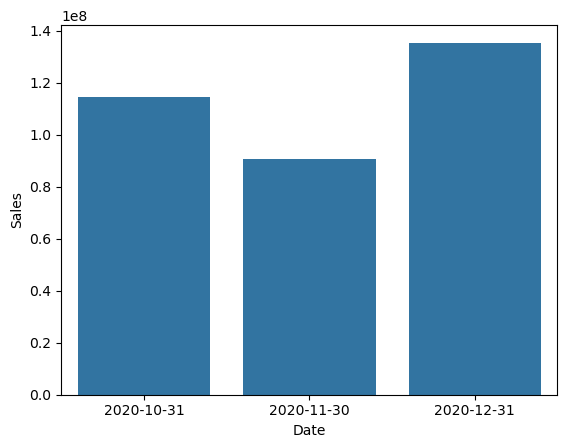

In [63]:
sns.barplot(data=plot_df['Sales'])

<Axes: ylabel='Sales'>

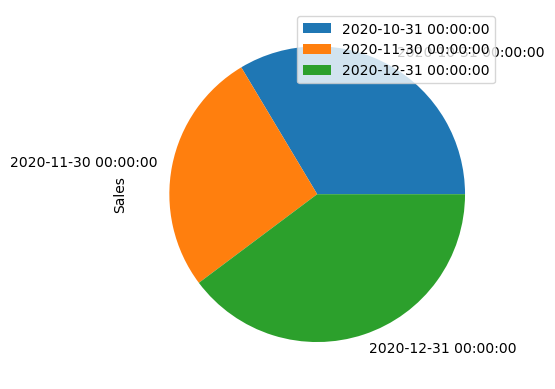

In [64]:
df.resample('M').sum(numeric_only=True)['Sales'].plot(kind="pie",legend=True)

<Axes: xlabel='Date'>

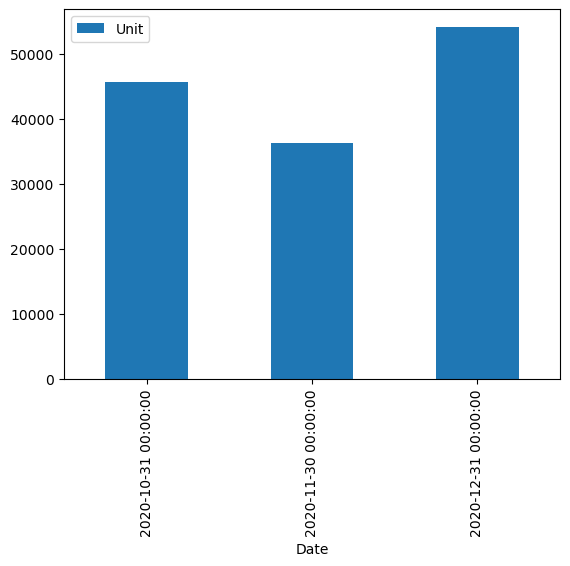

In [65]:
df.resample('M').sum(numeric_only=True)['Unit'].plot(kind="bar",legend=True)

In [66]:
df.resample('M').sum(numeric_only=True).max()

Unit         54132
Sales    135330000
dtype: int64

<span style="background-color: #FFFF00">
    <b>Clearly, the December month saw the highest figures in terms of units sold and Sales amount. This may be atributed to the festive season. The month of 
    November saw a dip in the sales figues. This may be probably due to people saving for the month of December, the Christmas month</b>
</span>

<h3>Normalisation</h3>

In [67]:
df['Sales']=df['Sales']/df['Sales'].max()

In [68]:
df.head()

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,0.123077
2020-10-01,Morning,WA,Men,8,0.123077
2020-10-01,Morning,WA,Women,4,0.061538
2020-10-01,Morning,WA,Seniors,15,0.230769
2020-10-01,Afternoon,WA,Kids,3,0.046154


In [69]:
df['Unit']=df['Unit']/df['Unit'].max()

In [70]:
df.head()

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,0.123077,0.123077
2020-10-01,Morning,WA,Men,0.123077,0.123077
2020-10-01,Morning,WA,Women,0.061538,0.061538
2020-10-01,Morning,WA,Seniors,0.230769,0.230769
2020-10-01,Afternoon,WA,Kids,0.046154,0.046154


In [71]:
df.groupby(by=['State', 'Group'],observed=False)["Sales"].sum()

State  Group   
 NSW    Kids       114.384615
        Men        117.061538
        Seniors    111.923077
        Women      117.984615
 NT     Kids        35.076923
        Men         35.461538
        Seniors     33.630769
        Women       34.784615
 QLD    Kids        52.369231
        Men         51.646154
        Seniors     50.400000
        Women       51.230769
 SA     Kids        89.323077
        Men         90.184615
        Seniors     90.569231
        Women       92.123077
 TAS    Kids        35.538462
        Men         35.430769
        Seniors     34.769231
        Women       34.323077
 VIC    Kids       162.215385
        Men        162.507692
        Seniors    161.938462
        Women      162.969231
 WA     Kids        34.615385
        Men         35.400000
        Seniors     33.923077
        Women       32.384615
Name: Sales, dtype: float64

<Axes: xlabel='State,Group'>

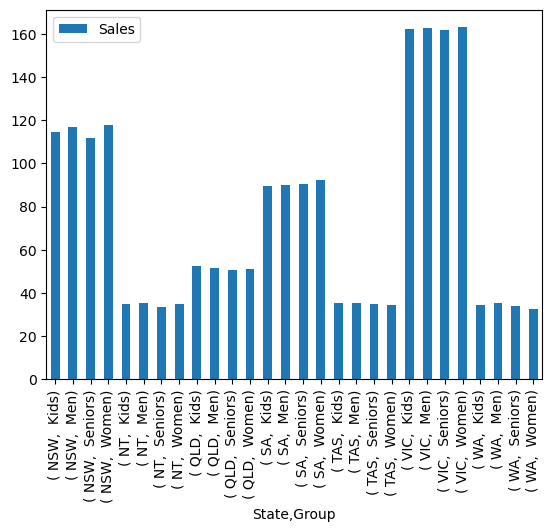

In [72]:
df.groupby(by=['State', 'Group'],observed=False)["Sales"].sum().plot(kind="bar",legend=True,)

<span style="background-color: #FFFF00">
    <b>Clearly, Highest sales are from state VIC, followed by NSW and SA.</b>
</span>

<Axes: xlabel='Group,State'>

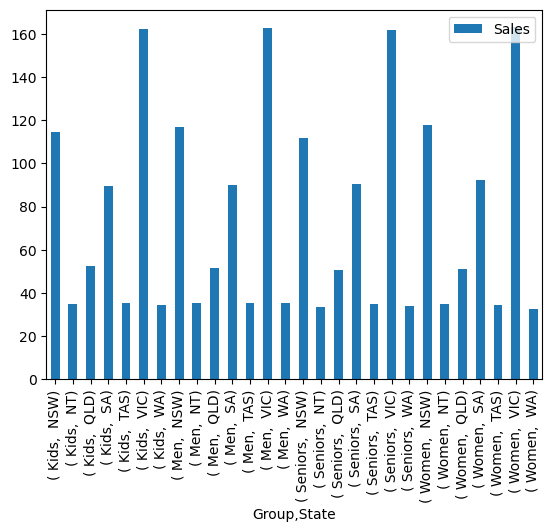

In [73]:
df.groupby(by=['Group','State'],observed=False)["Sales"].sum().plot(kind="bar",legend=True,)

<span style="background-color: #FFFF00">
    <b>In all four categories namely Kids, Men, Women and Senior the highest sales are in state of VIC</b>
</span>

In [74]:
plot_df=df.groupby(by=['Time'],observed=False)["Sales"].sum()
plot_df

Time
 Afternoon    701.584615
 Evening      689.769231
 Morning      702.815385
Name: Sales, dtype: float64

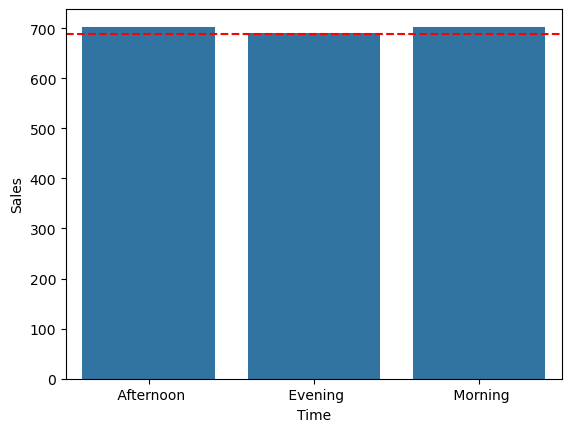

In [75]:
sns.barplot(data=plot_df)
plt.axhline(color='r',y=689,linestyle='--')
plt.show()

<span style="background-color: #FFFF00">
    <b>As seen from given data, the sales dip a little bit in evening ans compared to morning and afternoon</b>
</span>
        

In [76]:
plot_df=df.groupby(by=['Group'],observed=False)["Sales"].sum()
plot_df

Group
 Kids       523.523077
 Men        527.692308
 Seniors    517.153846
 Women      525.800000
Name: Sales, dtype: float64

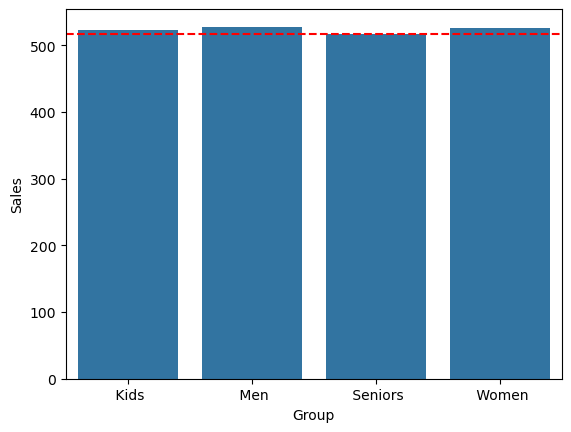

In [77]:
sns.barplot(data=plot_df)
plt.axhline(color='r',y=517,linestyle='--')
plt.show()

<span style="background-color: #FFFF00">
    <b>It is clear from data that the shoping for seniors is comparitively lesser than Kids, Men and Women</b>
</span>

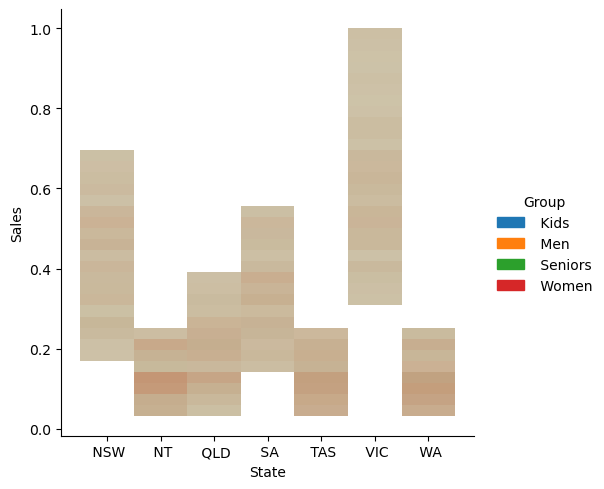

In [123]:
sns.displot(data=df,x='State',y='Sales',hue='Group',height=5,alpha=0.6)
plt.show()

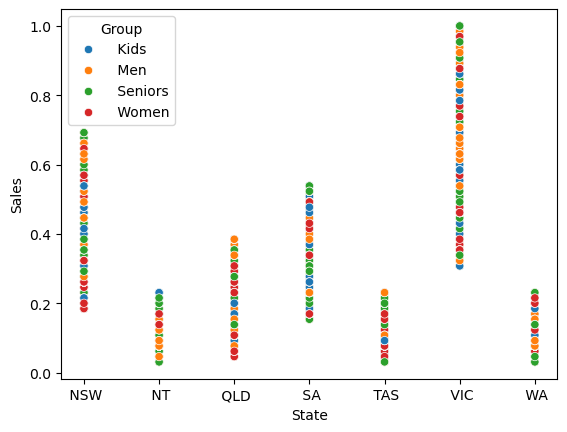

In [98]:
sns.scatterplot(data=df,x='State',y='Sales',hue='Group')
plt.show()

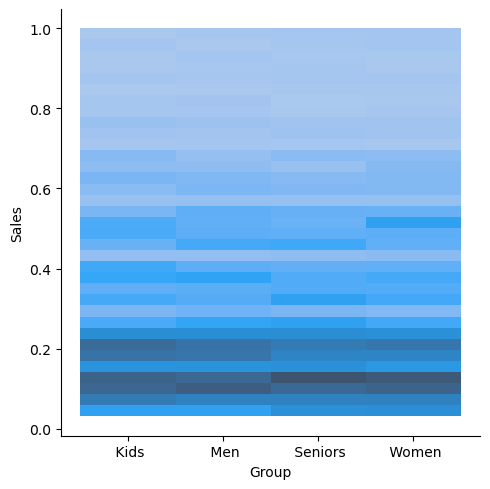

In [125]:
sns.displot(data=df,x='Group',y='Sales',height=5)
plt.show()